In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Slide 2

In [2]:
fulldata = pd.read_csv("q1_2017_all.csv", sep=",")
fulldata['Date'] = pd.to_datetime(fulldata['Date'], format='%Y%m%d')
fulldata = fulldata.drop_duplicates(subset=('Date','Ticker'), keep='first')
fulldata = fulldata.copy()
fulldata['McapRank'] = fulldata['McapRank'].astype('category').cat.as_ordered()
fulldata['TurnRank'] = fulldata['TurnRank'].astype('category').cat.as_ordered()
fulldata['VolatilityRank'] = fulldata['VolatilityRank'].astype('category').cat.as_ordered()
fulldata['PriceRank'] = fulldata['PriceRank'].astype('category').cat.as_ordered()

In [3]:
tickkeep = list(set(fulldata['Ticker']))[1:100]
fulldata = fulldata[fulldata['Ticker'].isin(tickkeep)]

## Slide 3

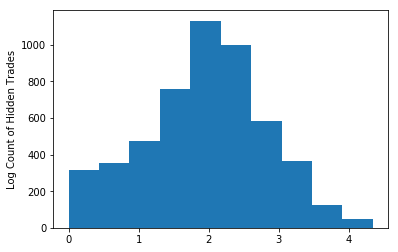

In [4]:
fig, axs = plt.subplots(1, 1)
axs.hist(np.log10(fulldata['Hidden'][fulldata['Hidden'] > 0]))
axs.set_ylabel("Log Count of Hidden Trades")
plt.show()

## Slide 5

C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


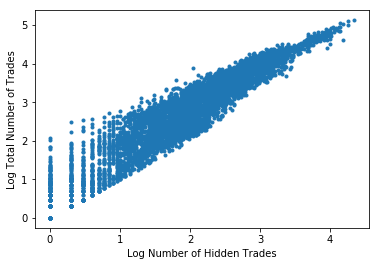

In [5]:
fig, axs = plt.subplots(1, 1)
axs.plot(np.log10(fulldata['Hidden']),
         np.log10(fulldata['TradesForHidden']),
         marker='.', linestyle='None')
axs.set_xlabel("Log Number of Hidden Trades")
axs.set_ylabel("Log Total Number of Trades")
plt.show()

## Slide 9, 10

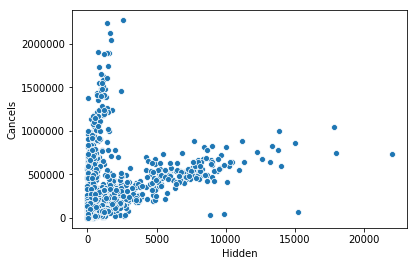

In [6]:
ax = sns.scatterplot(x="Hidden", y="Cancels", data=fulldata)

## Slide 12

Text(0, 0.5, 'Cancelled Orders')

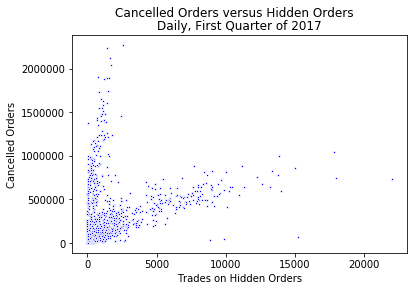

In [7]:
ax = sns.scatterplot(x="Hidden", y="Cancels", data=fulldata,
                     s=5, color="blue")
plt.suptitle("Cancelled Orders versus Hidden Orders")
plt.title("Daily, First Quarter of 2017")
plt.xlabel("Trades on Hidden Orders")
plt.ylabel("Cancelled Orders")

## Slide 15

Text(0, 0.5, 'Cancelled Orders')

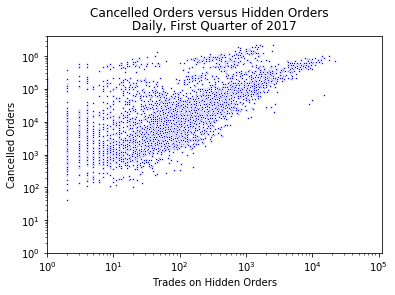

In [8]:
ax = sns.scatterplot(x="Hidden", y="Cancels", data=fulldata,
                     s=5, color="blue")
ax.set(xscale="log", yscale="log",
       xlim=(1, None), ylim=(1, None))
plt.suptitle("Cancelled Orders versus Hidden Orders")
plt.title("Daily, First Quarter of 2017")
plt.xlabel("Trades on Hidden Orders")
plt.ylabel("Cancelled Orders")

## Slide 17

Text(0, 0.5, 'Cancelled Orders')

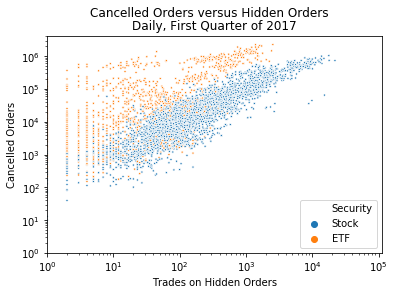

In [9]:
ax = sns.scatterplot(x="Hidden", y="Cancels", data=fulldata,
                     s=5, hue="Security")
ax.set(xscale="log", yscale="log",
       xlim=(1, None), ylim=(1, None))
plt.suptitle("Cancelled Orders versus Hidden Orders")
plt.title("Daily, First Quarter of 2017")
plt.xlabel("Trades on Hidden Orders")
plt.ylabel("Cancelled Orders")

## Slide 19

Text(0, 0.5, 'Total Daily Observations')

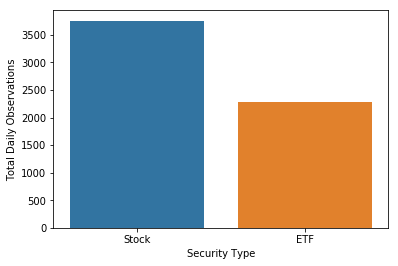

In [10]:
ax = sns.countplot(x="Security", data=fulldata)
plt.xlabel("Security Type")
plt.ylabel("Total Daily Observations")

## Slide 22

In [11]:
fulldataStock = fulldata[ (fulldata["Security"] == "Stock") & (fulldata["McapRank"].notnull()) ]

In [12]:
df = fulldata.groupby(['McapRank', 'VolatilityRank'])['McapRank'].count().unstack('VolatilityRank').fillna(0)

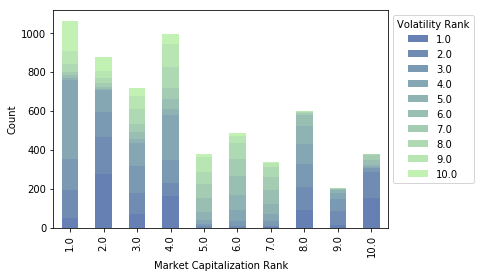

In [13]:
color = [((x+10)/25.0, (x+10)/20.0, 0.7) for x in range(len(df))]
df.plot(kind='bar', stacked=True, color=color, legend=False)
plt.xlabel("Market Capitalization Rank")
plt.ylabel("Count")
plt.legend(title="Volatility Rank", bbox_to_anchor=(1.0, 1.0))

## Slide 24

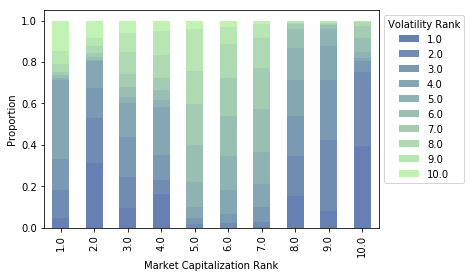

In [14]:
df2 = df.div(df.sum(axis=1), axis=0)
df2.plot(kind='bar', stacked=True, color=color, legend=False)
plt.xlabel("Market Capitalization Rank")
plt.ylabel("Proportion")
plt.legend(title="Volatility Rank", bbox_to_anchor=(1.0, 1.0))

## Slide 26

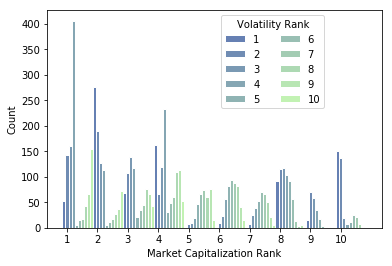

In [15]:
barWidth = 0.1
r1 = np.arange(len(df))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]

# Make the plot
plt.bar(r1, df[1], color=color[0], width=barWidth, edgecolor='white', label='1')
plt.bar(r2, df[2], color=color[1], width=barWidth, edgecolor='white', label='2')
plt.bar(r3, df[3], color=color[2], width=barWidth, edgecolor='white', label='3')
plt.bar(r4, df[4], color=color[3], width=barWidth, edgecolor='white', label='4')
plt.bar(r5, df[5], color=color[4], width=barWidth, edgecolor='white', label='5')
plt.bar(r6, df[6], color=color[5], width=barWidth, edgecolor='white', label='6')
plt.bar(r7, df[7], color=color[6], width=barWidth, edgecolor='white', label='7')
plt.bar(r8, df[8], color=color[7], width=barWidth, edgecolor='white', label='8')
plt.bar(r9, df[9], color=color[8], width=barWidth, edgecolor='white', label='9')
plt.bar(r10, df[10], color=color[9], width=barWidth, edgecolor='white', label='10')
 
# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(df))], [1,2,3,4,5,6,7,8,9,10])
 
# Create legend & Show graphic
plt.xlabel("Market Capitalization Rank")
plt.ylabel("Count")
plt.legend(title="Volatility Rank", loc=(0.52,0.55), ncol=2)

## jitter

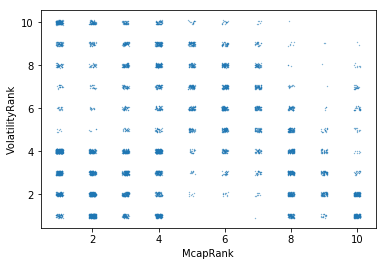

In [16]:
mcap = fulldata["McapRank"].astype("float")
vol = fulldata["VolatilityRank"].astype("float")
sns.regplot(x=mcap, y=vol, scatter=True, fit_reg=False,
            x_jitter=0.1, y_jitter=0.1, scatter_kws={'s':0.1})

## Slide 29

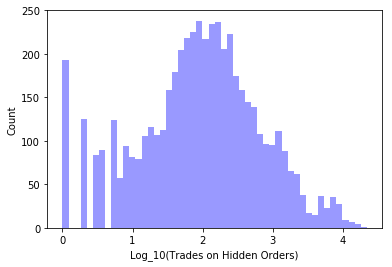

In [37]:
fig, axs = plt.subplots(1, 1)
ax = sns.distplot(np.log10(fulldata['Hidden'][fulldata['Hidden'] > 0]), kde=False,
                  bins=50, color="blue")
axs.set_xlabel("Log_10(Trades on Hidden Orders)")
axs.set_ylabel("Count")
plt.show()

## Slide 30

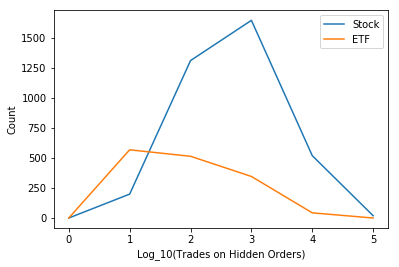

In [60]:
fig, axs = plt.subplots(1, 1)
counts, bins = np.histogram(np.log10(fulldata['Hidden'][(fulldata['Hidden'] > 0) & (fulldata['Security'] == "Stock")]),
                            bins=range(-1,6,1))
counts2, bins2 = np.histogram(np.log10(fulldata['Hidden'][(fulldata['Hidden'] > 0) & (fulldata['Security'] == "ETF")]),
                            bins=range(-1,6,1))
plt.plot(bins[:-1]+1, counts, label="Stock")
plt.plot(bins2[:-1]+1, counts2, label="ETF")
axs.set_xlabel("Log_10(Trades on Hidden Orders)")
axs.set_ylabel("Count")
plt.legend()

## Slide 32

C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\artist.py:913: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  return func(v)


Text(0, 0.5, 'Trades on Hidden Orders')

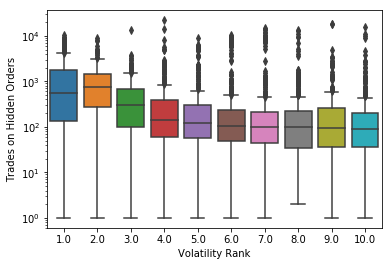

In [74]:
fulldataStockUse = fulldataStock[fulldataStock["Hidden"] > 0]
ax = sns.boxplot(x="VolatilityRank", y="Hidden", data=fulldataStockUse)
ax.set(yscale="log", ylim=(0, None))
ax.set_xlabel("Volatility Rank")
ax.set_ylabel("Trades on Hidden Orders")

## Slide 34

C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\artist.py:913: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  return func(v)


Text(0, 0.5, 'Trades on Hidden Orders')

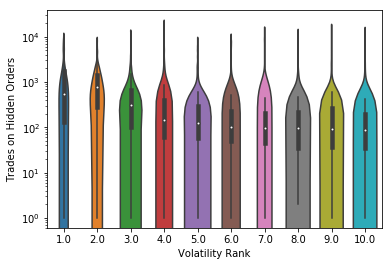

In [72]:
ax = sns.violinplot(x="VolatilityRank", y="Hidden", data=fulldataStockUse)
ax.set(yscale="log", ylim=(0, None))
ax.set_xlabel("Volatility Rank")
ax.set_ylabel("Trades on Hidden Orders")

## Slide 36

In [100]:
fulldata["Month"] = fulldata["Date"].map(lambda x: x.month)

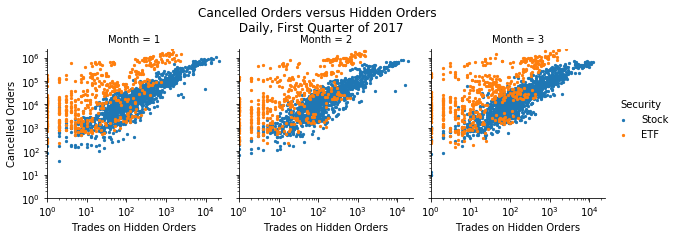

In [134]:
g = sns.FacetGrid(fulldata, col="Month", hue="Security")
g.map(plt.scatter, "Hidden", "Cancels", s=5)
g.set(xscale="log", yscale="log", xlim=(1, None), ylim=(1, None))
g.fig.suptitle("Cancelled Orders versus Hidden Orders \n Daily, First Quarter of 2017", y=1.08)
g.set_xlabels("Trades on Hidden Orders")
g.set_ylabels("Cancelled Orders")
g.add_legend()

## Slide 39

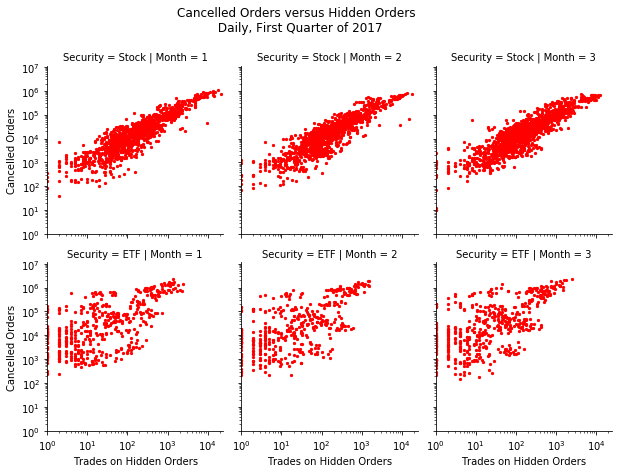

In [138]:
g = sns.FacetGrid(fulldata, row="Security", col="Month")
g.map(plt.scatter, "Hidden", "Cancels", s=5, color="red")
g.set(xscale="log", yscale="log", xlim=(1, None), ylim=(1, None))
g.fig.suptitle("Cancelled Orders versus Hidden Orders \n Daily, First Quarter of 2017", y=1.08)
g.set_xlabels("Trades on Hidden Orders")
g.set_ylabels("Cancelled Orders")
g.add_legend()

## Slide 41

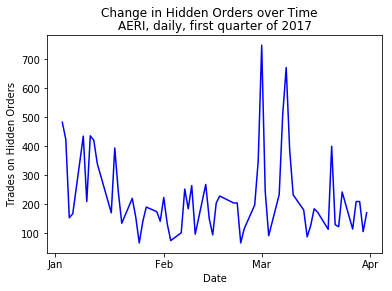

In [98]:
fulldataAERI = fulldata[fulldata["Ticker"] == "AERI"]
ax = sns.lineplot(x="Date", y="Hidden", data=fulldataAERI, color='blue')
#ax = sns.tsplot(data = fulldataAERI["Hidden"], time=fulldataAERI["Date"])
plt.suptitle("Change in Hidden Orders over Time")
plt.title("AERI, daily, first quarter of 2017")
plt.xlabel("Date")
plt.ylabel("Trades on Hidden Orders")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))